# Relax Data Science Challenge

The data is available as two attached CSV files:
takehome_user_engagement.csv
takehome_users.csv

The data has the following two tables:
1] A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years.
2] A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven-day period, identify which factors predict future user adoption.

We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings ( the more concise, the better -- no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [2]:
#import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read datasets to dataframe
# Convert takehome_users.csv to utf-8 in order to open it properly
df_users = pd.read_csv('C:/Users/JR/Documents/Data Science Class/relax_challenge/takehome_users.csv')
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
df_engage = pd.read_csv('C:/Users/JR/Documents/Data Science Class/relax_challenge/takehome_user_engagement.csv')
df_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
print('There are {} users signed up for the product.'.format(len(df_users['object_id'].unique())))
print('There are {} users logged into the product.'.format(len(df_engage['user_id'].unique())))

There are 12000 users signed up for the product.
There are 8823 users logged into the product.


In [6]:
# Are there any missing values?
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
# Fill in empty values of invited_by_user_id 
df_users['invited_by_user_id'] = df_users['invited_by_user_id'].fillna(0)

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
df_users['adopted'] = 0
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [10]:
# Convert object to datetime
df_engage['time_stamp'] = pd.to_datetime(df_engage['time_stamp'])
# print(df_engage.info())

# Set index to 'time_stamp'
df_engage = df_engage.set_index('time_stamp')

In [11]:
print(df_engage.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB
None


## Exploratory Data Analysis

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

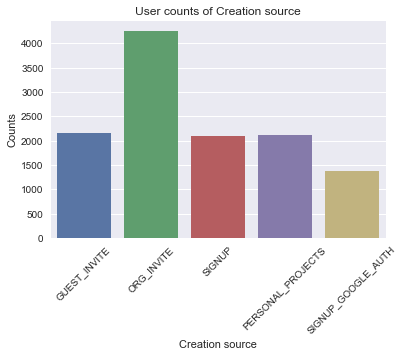

In [12]:
sns.countplot(x='creation_source', data=df_users)
plt.title('User counts of Creation source')
plt.xlabel("Creation source")
plt.ylabel("Counts")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

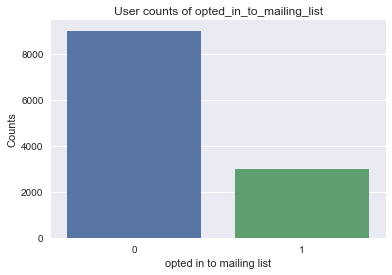

In [21]:
sns.countplot(x='opted_in_to_mailing_list', data=df_users)
plt.title('User counts of opted_in_to_mailing_list')
plt.xlabel("opted in to mailing list")
plt.ylabel("Counts")
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

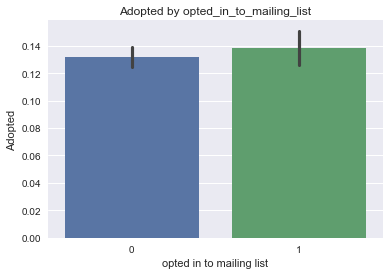

In [22]:
sns.barplot(x='opted_in_to_mailing_list', y='adopted', data=df_users)
plt.title('Adopted by opted_in_to_mailing_list')
plt.xlabel("opted in to mailing list")
plt.ylabel("Adopted")
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

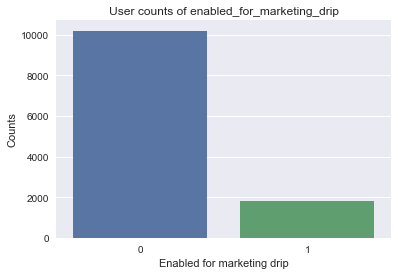

In [23]:
sns.countplot(x='enabled_for_marketing_drip', data=df_users)
plt.title('User counts of enabled_for_marketing_drip')
plt.xlabel("Enabled for marketing drip")
plt.ylabel("Counts")
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

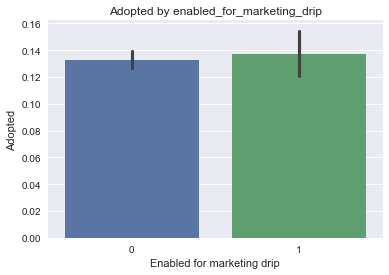

In [24]:
sns.barplot(x='enabled_for_marketing_drip', y='adopted', data=df_users)
plt.title('Adopted by enabled_for_marketing_drip')
plt.xlabel("Enabled for marketing drip")
plt.ylabel("Adopted")
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

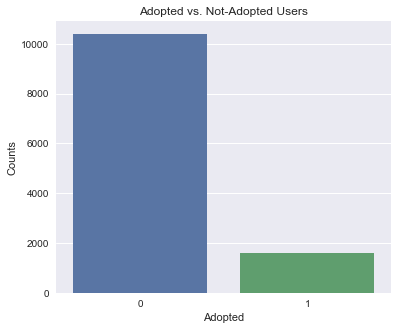

In [25]:
# Distribution of adopted users
sns.mpl.rc("figure", figsize=(6,5))
sns.barplot(x = list(df_users['adopted'].value_counts().index), y = df_users['adopted'].value_counts())
#df_users.groupby('adopted').size().plot(kind='bar')
plt.title('Adopted vs. Not-Adopted Users')
plt.xlabel("Adopted")
plt.ylabel("Counts")
plt.xticks(rotation=0)

## Machine Learning

In [23]:
# Group the datapoints by periods of 1 week and by user_id
adopted_user_df = df_engage.groupby(['user_id', pd.TimeGrouper(freq='7D')]).sum()

# Filter users that have 3 or more visits in one week period
adopted_user_df = adopted_user_df.loc[adopted_user_df.visited >= 3, :]

# Reset index
adopted_user_df = adopted_user_df.reset_index()

# Print Dataframe
adopted_user_df.head(10)

,user_id,time_stamp,visited
0,2,2014-02-06 08:20:06,3
1,10,2013-02-14 08:20:06,3
2,10,2013-02-28 08:20:06,3
3,10,2013-03-14 08:20:06,3
4,10,2013-04-11 08:20:06,4
5,10,2013-04-25 08:20:06,4
6,10,2013-05-02 08:20:06,5
7,10,2013-05-09 08:20:06,3
8,10,2013-05-23 08:20:06,4
9,10,2013-06-06 08:20:06,4


In [24]:
# Create separate Dataframe for all unique "adopted" users
adoption_df = pd.DataFrame(adopted_user_df['user_id'].unique(), columns={"object_id":"0"})
adoption_df['user_status'] = 'Active'
adoption_df.head()

,object_id,user_status
0,2,Active
1,10,Active
2,42,Active
3,43,Active
4,53,Active


In [34]:
# Merge adoption_df and users_df
active_user_df = pd.merge(left=df_users, right=adoption_df, on=None, how='outer')
active_user_df['user_status'] = active_user_df['user_status'].fillna(value='Inactive')
active_user_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,user_status
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,Inactive
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0,Active
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,Inactive
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,Inactive
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,Inactive
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0,Inactive
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,0.0,0,Inactive
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,0.0,0,Inactive
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,0.0,0,Inactive
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,0,Active


In [35]:
# Drop name and email column
active_user_df = active_user_df.drop(['creation_time','name', 'email', 'object_id', 'org_id'], axis=1)
print(active_user_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 7 columns):
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
invited_by_user_id            12000 non-null float64
adopted                       12000 non-null int64
user_status                   12000 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 750.0+ KB
None


In [36]:
#Drop NaNs
active_user_df = active_user_df.dropna()
active_user_df

,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,user_status
0,GUEST_INVITE,1.398139e+09,1,0,10803.0,0,Inactive
1,ORG_INVITE,1.396238e+09,0,0,316.0,0,Active
2,ORG_INVITE,1.363735e+09,0,0,1525.0,0,Inactive
3,GUEST_INVITE,1.369210e+09,0,0,5151.0,0,Inactive
4,GUEST_INVITE,1.358850e+09,0,0,5240.0,0,Inactive
5,GUEST_INVITE,1.387424e+09,0,0,11241.0,0,Inactive
6,SIGNUP,1.356010e+09,0,1,0.0,0,Inactive
9,ORG_INVITE,1.401833e+09,1,1,4143.0,0,Active
10,SIGNUP,1.388117e+09,0,0,0.0,0,Inactive
12,ORG_INVITE,1.396196e+09,0,0,11204.0,0,Inactive


In [37]:
# Dummify all columns with categorical features 
dummy_cols_convert = pd.get_dummies(active_user_df, drop_first=True)
dummy_cols_convert

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,user_status_Inactive
0,1.398139e+09,1,0,10803.0,0,0,0,0,0,1
1,1.396238e+09,0,0,316.0,0,1,0,0,0,0
2,1.363735e+09,0,0,1525.0,0,1,0,0,0,1
3,1.369210e+09,0,0,5151.0,0,0,0,0,0,1
4,1.358850e+09,0,0,5240.0,0,0,0,0,0,1
5,1.387424e+09,0,0,11241.0,0,0,0,0,0,1
6,1.356010e+09,0,1,0.0,0,0,0,1,0,1
9,1.401833e+09,1,1,4143.0,0,1,0,0,0,0
10,1.388117e+09,0,0,0.0,0,0,0,1,0,1
12,1.396196e+09,0,0,11204.0,0,1,0,0,0,1


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Instantiate a Logistic Regression Classifier (logreg)
logreg = LogisticRegression()

# Choose X = feature and Y = target
Y = dummy_cols_convert['user_status_Inactive']
X_all = dummy_cols_convert.drop('user_status_Inactive', axis=1)

# RFE to help find most important features
rfe = RFE(logreg, 3)
rfe = rfe.fit(X_all, Y)
print(rfe.support_) # support returns boolean with top 3 features
print(rfe.ranking_) # ranking returns an integer with 1 being a top feature

# Get column names (features) from DataFrame, dummy_cols_convert
col_names = X_all.columns.values

# Print best feature names
best_features_raw = rfe.support_ * col_names

# Create list with best feature names
best_features = []

for best_feature in best_features_raw:
    if len(best_feature) > 0:
        best_features.append(best_feature)
        
print('Best Predictors for User Adoption: {}'.format(best_features))

[ True False False  True False  True False False False]
[1 3 5 1 7 1 6 2 4]
Best Predictors for User Adoption: ['last_session_creation_time', 'invited_by_user_id', 'creation_source_ORG_INVITE']


In conclusion the best triggers to identify who will be an active user is by looking at who registered them, the last time they were active, and the how the invite came from using Regression

Next time I would try random forests for prediction as they sound ridculous for their reasons and for further analysis would be to look at gender, race, location, and occupation if that data can be made available.